In [2]:
import QuantLib as ql
import pandas as pd

In [3]:
tasa_cupon = 0.0713
periodicidad = 2

In [4]:
precio = 102.42

In [5]:
fecha_emision = pd.to_datetime('2015-12-22')
fecha_vence = pd.to_datetime('2021-12-22')
fecha_calculo = pd.to_datetime('2020-02-12')

In [6]:
fecha_calc_ql = ql.Date(fecha_calculo.day,fecha_calculo.month,fecha_calculo.year)

ql.Settings.instance().evaluationDate = fecha_calc_ql

In [7]:
qlCalendar = ql.BespokeCalendar('Costa Rica')
qlCalendar.addWeekend(ql.Sunday)
qlCalendar.addWeekend(ql.Saturday)
qlCalendar.addHoliday(ql.Date(25,12,2020))
qlCalendar.addHoliday(ql.Date(1,1,2021))
qlCalendar.addHoliday(ql.Date(15,9,2020))

In [8]:
qlCalendar.holidayList(ql.Date(1,1,2020),ql.Date(1,1,2022),False)

(Date(15,9,2020), Date(25,12,2020), Date(1,1,2021))

In [9]:
intervalo = ql.Period(60,ql.Days)
print(fecha_calc_ql)

February 12th, 2020


In [10]:
fecha = fecha_calc_ql + intervalo
print(fecha)

April 12th, 2020


In [11]:
fecha_1 = qlCalendar.advance(fecha_calc_ql,intervalo)
print(fecha_1)

May 6th, 2020


In [12]:
fecha_vence_ql = ql.Date(fecha_vence.day,fecha_vence.month,fecha_vence.year)
fecha_emision_ql = ql.Date(fecha_emision.day,fecha_emision.month,fecha_emision.year)

In [13]:
qlTenor = ql.Period(periodicidad)
qlConvencion = ql.Following
dateGeneration = ql.DateGeneration.Backward
monthEnd = False

In [14]:
cronograma = ql.Schedule(fecha_emision_ql,fecha_vence_ql,qlTenor,
                         qlCalendar,qlConvencion,qlConvencion,dateGeneration,monthEnd)
# list(cronograma)
pd.DataFrame({'date':list(cronograma)})

,date
0,"December 22nd, 2015"
1,"June 22nd, 2016"
2,"December 22nd, 2016"
3,"June 22nd, 2017"
4,"December 22nd, 2017"
5,"June 22nd, 2018"
6,"December 24th, 2018"
7,"June 24th, 2019"
8,"December 23rd, 2019"
9,"June 22nd, 2020"


In [15]:
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)

In [16]:
compound_type = ql.Compounded

In [17]:
frequency = ql.Semiannual

In [18]:
settlementDays = 0

In [28]:
interest_rate = ql.InterestRate(tasa_cupon,dayCount,compound_type,frequency)
print(interest_rate)

7.130000 % 30/360 (Bond Basis) Semiannual compounding


In [29]:
print(interest_rate.compoundFactor(1))

1.0725709225


In [30]:
print(interest_rate.discountFactor(4))

0.7556069152825599


In [36]:
nueva_tasa = interest_rate.equivalentRate(compound_type,ql.Annual,1)
print(nueva_tasa)

7.257092 % 30/360 (Bond Basis) Annual compounding


### Creación del bono

In [38]:
bono = ql.FixedRateBond(settlementDays,100,cronograma,[tasa_cupon],dayCount)
bono

<QuantLib.QuantLib.FixedRateBond; proxy of <Swig Object of type 'ext::shared_ptr< FixedRateBond > *' at 0x00000264B6623F60> >

In [39]:
cf = bono.cashflows()
fechas = [item.date() for item in cf]
montos = [item.amount() for item in cf]
print(pd.DataFrame({'Fechas':fechas,'Montos':montos}))

                 Fechas      Montos
0       June 22nd, 2016    3.565000
1   December 22nd, 2016    3.565000
2       June 22nd, 2017    3.565000
3   December 22nd, 2017    3.565000
4       June 22nd, 2018    3.565000
5   December 24th, 2018    3.604611
6       June 24th, 2019    3.565000
7   December 23rd, 2019    3.545194
8       June 22nd, 2020    3.545194
9   December 22nd, 2020    3.565000
10      June 22nd, 2021    3.565000
11  December 22nd, 2021    3.565000
12  December 22nd, 2021  100.000000


In [40]:
rend = bono.bondYield(precio,dayCount,compound_type,frequency)

In [41]:
rend

0.057349736690521236

In [42]:
interes_rend = ql.InterestRate(rend,dayCount,compound_type,frequency)

In [44]:
duracion=ql.BondFunctions.duration(bono,interes_rend,ql.Duration.Macaulay)
duracion

1.7619109199149028

In [45]:
duracionMod=ql.BondFunctions.duration(bono,interes_rend,ql.Duration.Modified)
duracionMod

1.7127967000390851

In [46]:
convexidad=ql.BondFunctions.convexity(bono,interes_rend)
convexidad

3.8669145300256282

#### Curvas de rendimiento

In [47]:
curvas = pd.read_csv(r'C:\Users\josea\Dropbox\CA0417\curso_python\curvas.csv')

In [48]:
curvas

,Unnamed: 0,DATE,TERM,RATE,CURRENCY
0,0,2017-07-24,0,0.003061,CRC
1,1,2017-07-24,30,0.003061,CRC
2,2,2017-07-24,60,0.008777,CRC
3,3,2017-07-24,90,0.014356,CRC
4,4,2017-07-24,120,0.019441,CRC
...,...,...,...,...,...
106797,106797,2019-09-02,5880,0.151905,CRC
106798,106798,2019-09-02,5910,0.153207,CRC
106799,106799,2019-09-02,5940,0.154600,CRC
106800,106800,2019-09-02,5970,0.155992,CRC


In [49]:
curvas.dtypes

Unnamed: 0      int64
DATE           object
TERM            int64
RATE          float64
CURRENCY       object
dtype: object

In [50]:
curvas['DATE'] = pd.to_datetime(curvas['DATE'])

In [53]:
tabla_curvas = curvas.pivot(values = 'RATE',index = 'DATE', columns = 'TERM')
tabla_curvas.head()

TERM,0,30,60,90,120,150,180,210,240,270,...,6150,6180,6210,6240,6270,6300,6330,6360,6390,6420
DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-24,0.003061,0.003061,0.008777,0.014356,0.019441,0.024398,0.028909,0.033159,0.037558,0.041297,...,0.128963,0.129401,0.129855,0.130295,0.130737,0.131195,0.131638,0.132099,0.132545,0.132993
2017-07-26,0.004831,0.004831,0.010409,0.015854,0.020817,0.025654,0.030058,0.034205,0.038500,0.042149,...,0.128715,0.129147,0.129596,0.130031,0.130467,0.130919,0.131358,0.131813,0.132254,0.132696
2017-07-27,0.080799,0.080799,0.080878,0.080962,0.081043,0.081129,0.081213,0.081299,0.081395,0.081483,...,0.124610,0.124958,0.125320,0.125671,0.126023,0.126389,0.126744,0.127113,0.127471,0.127830
2017-07-28,0.103137,0.103137,0.099782,0.096664,0.093966,0.091475,0.089337,0.087443,0.085614,0.084174,...,0.147953,0.149045,0.150184,0.151295,0.152416,0.153585,0.154726,0.155915,0.157074,0.158243
2017-07-31,0.103137,0.103137,0.099782,0.096664,0.093966,0.091475,0.089337,0.087443,0.085614,0.084174,...,0.147953,0.149045,0.150184,0.151295,0.152416,0.153585,0.154726,0.155915,0.157074,0.158243


In [54]:
tabla_curvas = tabla_curvas.loc[:,0:900]

In [55]:
tabla_curvas.head()

TERM,0,30,60,90,120,150,180,210,240,270,...,630,660,690,720,750,780,810,840,870,900
DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-24,0.003061,0.003061,0.008777,0.014356,0.019441,0.024398,0.028909,0.033159,0.037558,0.041297,...,0.071958,0.073563,0.075005,0.076391,0.077633,0.078787,0.079891,0.080879,0.081824,0.082666
2017-07-26,0.004831,0.004831,0.010409,0.015854,0.020817,0.025654,0.030058,0.034205,0.038500,0.042149,...,0.072104,0.073675,0.075087,0.076444,0.077662,0.078792,0.079876,0.080845,0.081772,0.082600
2017-07-27,0.080799,0.080799,0.080878,0.080962,0.081043,0.081129,0.081213,0.081299,0.081395,0.081483,...,0.082661,0.082770,0.082875,0.082986,0.083094,0.083204,0.083319,0.083431,0.083548,0.083663
2017-07-28,0.103137,0.103137,0.099782,0.096664,0.093966,0.091475,0.089337,0.087443,0.085614,0.084174,...,0.078079,0.078200,0.078374,0.078604,0.078871,0.079176,0.079525,0.079892,0.080297,0.080710
2017-07-31,0.103137,0.103137,0.099782,0.096664,0.093966,0.091475,0.089337,0.087443,0.085614,0.084174,...,0.078079,0.078200,0.078374,0.078604,0.078871,0.079176,0.079525,0.079892,0.080297,0.080710


In [56]:
import matplotlib.pyplot as plt

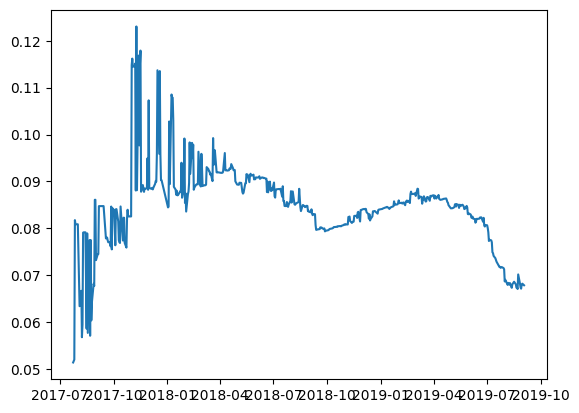

In [57]:
plt.plot(tabla_curvas[360])

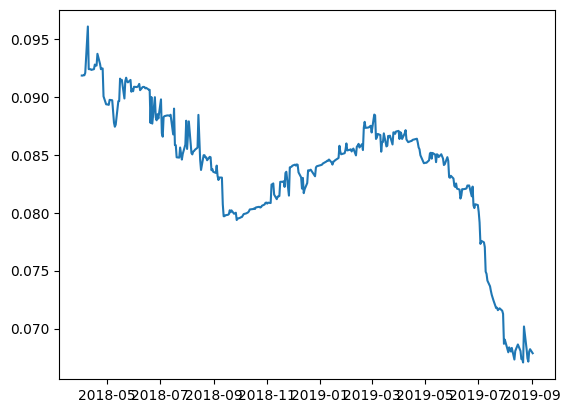

In [58]:
tabla_curvas = tabla_curvas.loc[tabla_curvas.index >= pd.to_datetime('2018-04-01'),:]
plt.plot(tabla_curvas[360])

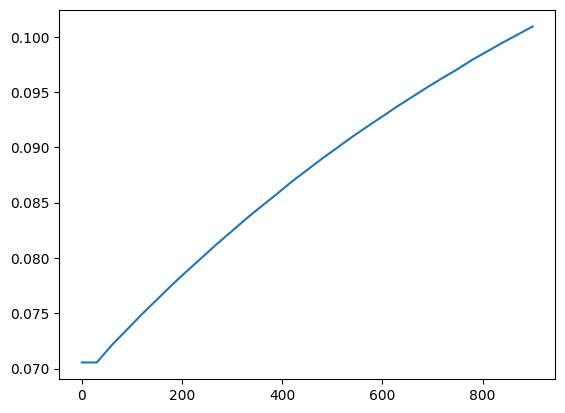

In [59]:
plt.plot(tabla_curvas.iloc[200,:])

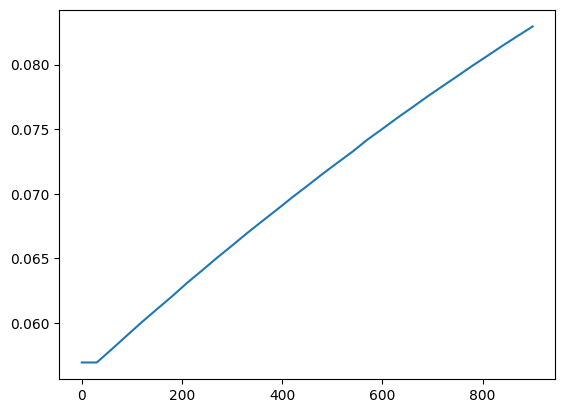

In [60]:
curva_actual = tabla_curvas.iloc[-1,:]
plt.plot(curva_actual)

In [61]:
tasa_actual = curva_actual.values
plazos = curva_actual.index.values
plazos

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
       390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750,
       780, 810, 840, 870, 900], dtype=int64)

In [62]:
curva_ql0 = ql.ZeroCurve(fecha_calc_ql+plazos,tasa_actual,ql.Thirty360(ql.Thirty360.BondBasis))
curva_ql = ql.YieldTermStructureHandle(curva_ql0)

In [63]:
estructura_plazos = ql.ZeroSpreadedTermStructure(
        curva_ql,ql.QuoteHandle(ql.SimpleQuote(0)), ql.Compounded,
        ql.Semiannual,dayCount)

In [64]:
pricing_engine = ql.DiscountingBondEngine(
        ql.RelinkableYieldTermStructureHandle(estructura_plazos))

In [65]:
bono.setPricingEngine(pricing_engine)
bono.NPV()

99.76569998007841

In [66]:
def Precio(spread):
    estructura_plazos = ql.ZeroSpreadedTermStructure(
            curva_ql,ql.QuoteHandle(ql.SimpleQuote(spread)), ql.Compounded,
            ql.Semiannual,dayCount)
    pricing_engine = ql.DiscountingBondEngine(
            ql.RelinkableYieldTermStructureHandle(estructura_plazos))
    
    bono.setPricingEngine(pricing_engine)
    return bono.NPV()

In [69]:
Precio(-0.01)

101.473507036049

In [70]:
def ErrorPrecio(spread):
    return precio-Precio(spread)

In [71]:
ErrorPrecio(0)

2.6543000199215925

In [72]:
from scipy.optimize import bisect

In [74]:
spread_estimado = bisect(ErrorPrecio,-1,1)
spread_estimado

-0.015447051244336762

In [75]:
Precio(spread_estimado)

102.42000000025038

## Cálculo de valor en riesgo por método paramétrico

Aproximación por variaciones paralelas

$VaR = \sigma \times \Phi^{-1}(q) \times W = D P \,\sigma_r \,z_q  W/100$

In [76]:
duracionMod

1.7127967000390851

In [78]:
from scipy.stats import norm

In [102]:
nivel_conf = 0.999
zq = norm.ppf(nivel_conf)
zq

3.090232306167813

In [103]:
cambios_tasas = tabla_curvas.diff(20).iloc[20:]
cambios_tasas.head()

TERM,0,30,60,90,120,150,180,210,240,270,...,630,660,690,720,750,780,810,840,870,900
DATE,,,,,,,,,,,,,,,,,,,,,
2018-05-02,-0.008266,-0.008266,-0.007661,-0.007004,-0.006339,-0.005768,-0.005252,-0.004694,-0.004228,-0.003739,...,-0.000182,-0.000025,0.000131,0.000252,0.000373,0.000467,0.000564,0.000634,0.000700,0.000767
2018-05-03,-0.008375,-0.008375,-0.007759,-0.007047,-0.006474,-0.005836,-0.005312,-0.004746,-0.004273,-0.003778,...,-0.000180,-0.000022,0.000135,0.000257,0.000378,0.000474,0.000571,0.000641,0.000708,0.000774
2018-05-04,-0.007430,-0.007430,-0.006853,-0.006186,-0.005623,-0.005125,-0.004603,-0.004091,-0.003673,-0.003230,...,-0.000115,0.000019,0.000153,0.000254,0.000357,0.000436,0.000518,0.000576,0.000631,0.000687
2018-05-07,-0.007692,-0.007692,-0.007082,-0.006385,-0.005796,-0.005272,-0.004701,-0.004235,-0.003739,-0.003283,...,-0.000083,0.000053,0.000190,0.000292,0.000397,0.000477,0.000560,0.000618,0.000673,0.000729
2018-05-09,-0.021922,-0.021922,-0.019394,-0.017047,-0.014995,-0.013133,-0.011415,-0.009906,-0.008520,-0.007311,...,0.000151,0.000378,0.000590,0.000746,0.000889,0.000993,0.001090,0.001151,0.001202,0.001246


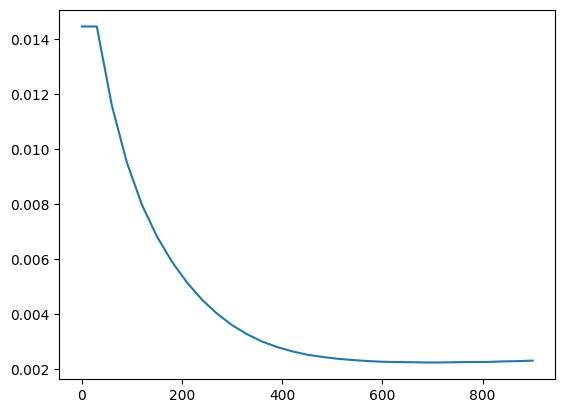

In [104]:
sigma_plazo=cambios_tasas.std()
plt.plot(sigma_plazo)

In [105]:
vol=sigma_plazo[600]
vol

0.00227238543860929

In [106]:
VaR = precio*duracionMod*zq*vol/100
VaR

0.012318666991503201

In [107]:
duracionMod

1.7127967000390851